In [1]:
# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('/Users/bingqihou/Documents/DataAnalysis54/bitcoin/shanghai_1990-12-19_to_2019-2-28.csv')

In [2]:
print(df.head(5))

    Timestamp   Price
0  1990/12/19   96.05
1  1990/12/20  104.30
2  1990/12/21  109.07
3  1990/12/24  113.57
4  1990/12/25  120.09


In [4]:
df.Timestamp=pd.to_datetime(df.Timestamp)
df.index=df.Timestamp
print(df.head(5))

            Timestamp   Price
Timestamp                    
1990-12-19 1990-12-19   96.05
1990-12-20 1990-12-20  104.30
1990-12-21 1990-12-21  109.07
1990-12-24 1990-12-24  113.57
1990-12-25 1990-12-25  120.09


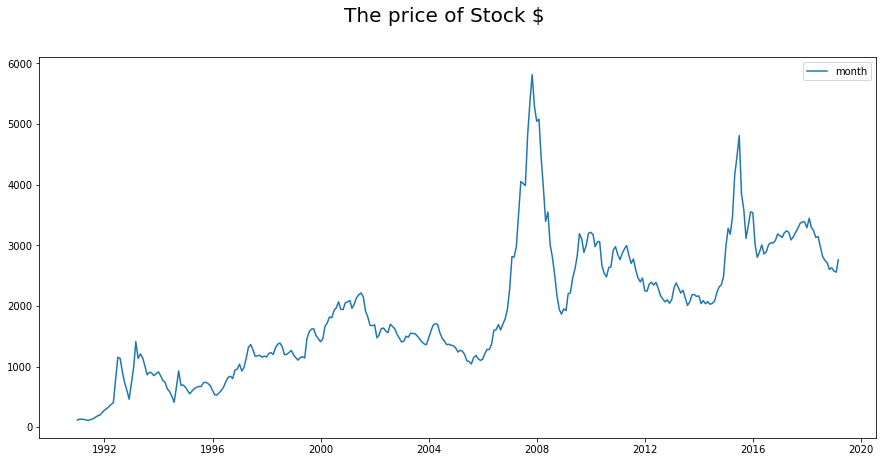

In [12]:
df_month = df.resample('M').mean()
fig = plt.figure(figsize=[15, 7])
plt.suptitle('The price of Stock $', fontsize=20)
plt.plot(df_month.Price,'-', label='month')
plt.legend( )

In [14]:
# 设置参数范围
p = range(0, 5)
q = range(0, 5)
param = product(p, q)
parameters_list = list(param)
print(parameters_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [15]:
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

参数错误: (0, 2)
参数错误: (0, 3)
参数错误: (0, 4)


In [27]:
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['param', 'aic']
print(result_table)

print('最优模型: ', best_model.summary())

     param          aic
0   (0, 0)  5691.864041
1   (0, 1)  5286.493355
2   (1, 0)  4474.736904
3   (1, 1)  4441.799482
4   (1, 2)  4433.184371
5   (1, 3)  4428.524440
6   (1, 4)  4425.296723
7   (2, 0)  4434.885928
8   (2, 1)  4436.779710
9   (2, 2)  4428.219216
10  (2, 3)  4429.010581
11  (2, 4)  4420.582221
12  (3, 0)  4436.766717
13  (3, 1)  4436.680208
14  (3, 2)  4427.560626
15  (3, 3)  4431.481536
16  (3, 4)  4421.929766
17  (4, 0)  4438.425939
18  (4, 1)  4436.528956
19  (4, 2)  4429.067198
20  (4, 3)  4417.867148
21  (4, 4)  4419.525366
最优模型:                                ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(4, 3)   Log Likelihood               -2199.934
Method:                       css-mle   S.D. of innovations            158.171
Date:                Sun, 13 Sep 2020   AIC                           4417.867
Time:                        16:54:28   BIC   

In [29]:
# 比特币预测
df_month2 = df_month[['Price']]


date_list = [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30), datetime(2019, 7, 31), 
             datetime(2019, 8, 31), datetime(2019, 9, 30), datetime(2019, 10, 31), datetime(2019, 11, 30), datetime(2019, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)

df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=348)
print(df_month2)

                 Price     forecast
1990-12-31  116.285556  1875.115989
1991-01-31  132.367273   138.887250
1991-02-28  131.877778   168.291132
1991-03-31  126.002381   161.790355
1991-04-30  118.459091   154.581397
...                ...          ...
2019-08-31         NaN  2783.317712
2019-09-30         NaN  2724.075793
2019-10-31         NaN  2692.681782
2019-11-30         NaN  2693.909897
2019-12-31         NaN  2661.889071

[349 rows x 2 columns]


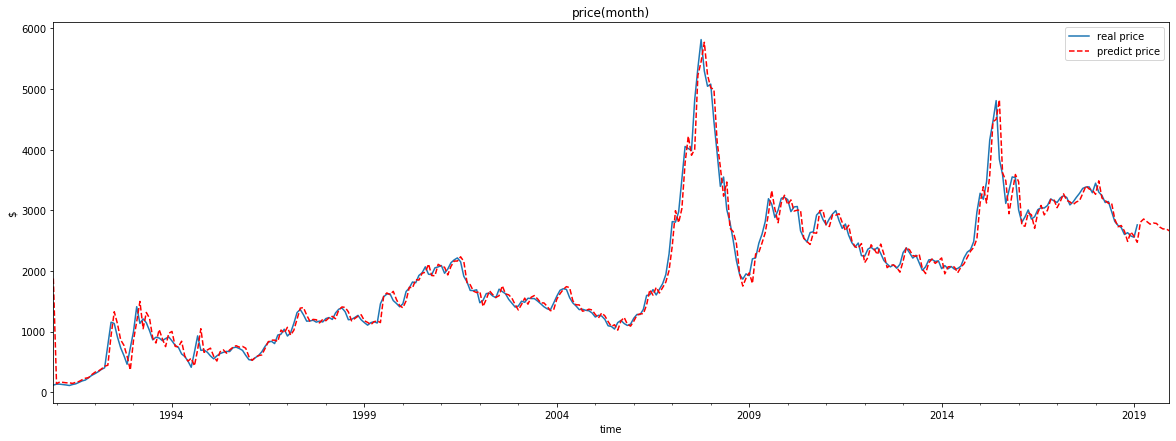

In [30]:
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Price.plot(label='real price')
df_month2.forecast.plot(color='r', ls='--', label='predict price')
plt.legend()
plt.title('price(month)')
plt.xlabel('time')
plt.ylabel('$')
plt.show()